<a href="https://colab.research.google.com/github/Suryabhan23/Assigment--1/blob/main/Suryabhan_SnapLens1_1%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import matplotlib.pyplot as plt


In [18]:
Transactions=pd.read_csv("https://raw.githubusercontent.com/Invact-Abhay/DOE/refs/heads/main/ActualTable.csv")
Budget = pd.read_csv("https://raw.githubusercontent.com/Invact-Abhay/DOE/refs/heads/main/BudgetTable.csv")
print (Transactions.head())
print(Budget.head())

        Date    Month Region  State Product Category  Quantity Sold
0  1/27/2023  January  North  Delhi     Professional             10
1  1/21/2023  January  North  Delhi     Professional             60
2  1/24/2023  January  North  Delhi     Professional             40
3  1/20/2023  January  North  Delhi     Professional             40
4  1/16/2023  January  North  Delhi     Professional             30
     Month Region   State Product Category  Budgeted Quantity
0  January  North   Delhi     Professional                 50
1  January  North   Delhi        Lifestyle                 50
2  January  North   Delhi        Adventure                 50
3  January  North  Punjab     Professional                 50
4  January  North  Punjab        Lifestyle                110


In [19]:
Transactions.columns
Transactions.columns= Transactions.columns.str.lower().str.replace(" ","_")
Transactions.columns

Index(['date', 'month', 'region', 'state', 'product_category',
       'quantity_sold'],
      dtype='object')

In [20]:
Budget.columns= Budget.columns.str.lower().str.replace(" ","_")
Budget.columns

Index(['month', 'region', 'state', 'product_category', 'budgeted_quantity'], dtype='object')

In [21]:
actual= Transactions.groupby(['month','region','state','product_category'])['quantity_sold'].sum().reset_index()
actual.head()

,month,region,state,product_category,quantity_sold
0,April,North,Delhi,Adventure,130
1,April,North,Delhi,Lifestyle,60
2,April,North,Delhi,Professional,60
3,April,North,Haryana,Adventure,10
4,April,North,Haryana,Lifestyle,180


In [22]:
merged_table=pd.merge(Budget,actual,on=['month','region','state','product_category'],how='left')
merged_table.head()

,month,region,state,product_category,budgeted_quantity,quantity_sold
0,January,North,Delhi,Professional,50,230.0
1,January,North,Delhi,Lifestyle,50,130.0
2,January,North,Delhi,Adventure,50,280.0
3,January,North,Punjab,Professional,50,120.0
4,January,North,Punjab,Lifestyle,110,150.0


In [23]:
merged_table['variance']=merged_table['quantity_sold']-merged_table['budgeted_quantity']
merged_table.head()

,month,region,state,product_category,budgeted_quantity,quantity_sold,variance
0,January,North,Delhi,Professional,50,230.0,180.0
1,January,North,Delhi,Lifestyle,50,130.0,80.0
2,January,North,Delhi,Adventure,50,280.0,230.0
3,January,North,Punjab,Professional,50,120.0,70.0
4,January,North,Punjab,Lifestyle,110,150.0,40.0


In [26]:
month_mapping={'January':1,
               'February':2,
               'March':3,
               'April':4,
               'May':5,
               'June':6,
               'July':7,
               'August':8,
               'Sepetember':9,
               'October':10,
               'November':11,
               'December':12}
merged_table['month_number']=merged_table['month'].map(month_mapping)
merged_table


,month,region,state,product_category,budgeted_quantity,quantity_sold,variance,month_number
0,January,North,Delhi,Professional,50,230.0,180.0,1.0
1,January,North,Delhi,Lifestyle,50,130.0,80.0,1.0
2,January,North,Delhi,Adventure,50,280.0,230.0,1.0
3,January,North,Punjab,Professional,50,120.0,70.0,1.0
4,January,North,Punjab,Lifestyle,110,150.0,40.0,1.0
...,...,...,...,...,...,...,...,...
319,December,West,Gujarat,Lifestyle,150,110.0,-40.0,12.0
320,December,West,Gujarat,Adventure,310,40.0,-270.0,12.0
321,December,West,Rajasthan,Professional,120,50.0,-70.0,12.0
322,December,West,Rajasthan,Lifestyle,290,10.0,-280.0,12.0


In [27]:
month_variance= merged_table.groupby(['month','month_number'])['variance'].sum().reset_index()
sorted_month_variance=month_variance.sort_values('month_number',ascending=True)
sorted_month_variance

,month,month_number,variance
4,January,1.0,1310.0
3,February,2.0,440.0
7,March,3.0,640.0
0,April,4.0,-160.0
8,May,5.0,-340.0
6,June,6.0,-1040.0
5,July,7.0,-600.0
1,August,8.0,-770.0
10,October,10.0,-2070.0
9,November,11.0,1350.0


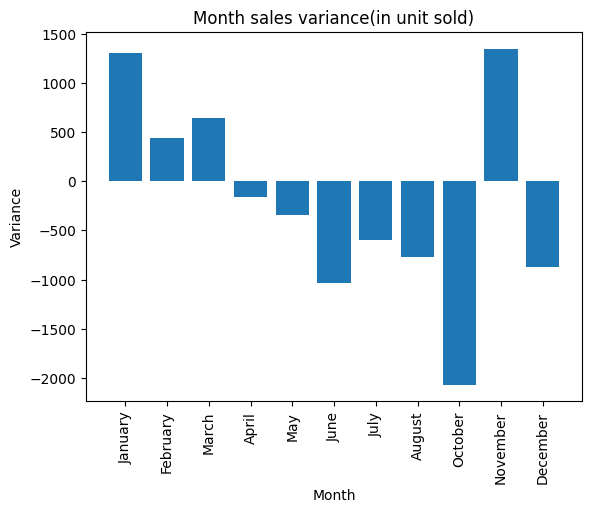

In [31]:
plt.bar(x=sorted_month_variance['month'],height=sorted_month_variance['variance'])
plt.xlabel("Month")
plt.ylabel("Variance")
plt.title("Month sales variance(in unit sold)")
plt.xticks(ticks=sorted_month_variance['month'],rotation=90)
plt.show()

In [32]:
regionwise_variance=merged_table.groupby(['region'])['variance'].sum().reset_index()
regionwise_variance

,region,variance
0,North,-720.0
1,South,-860.0
2,West,-350.0


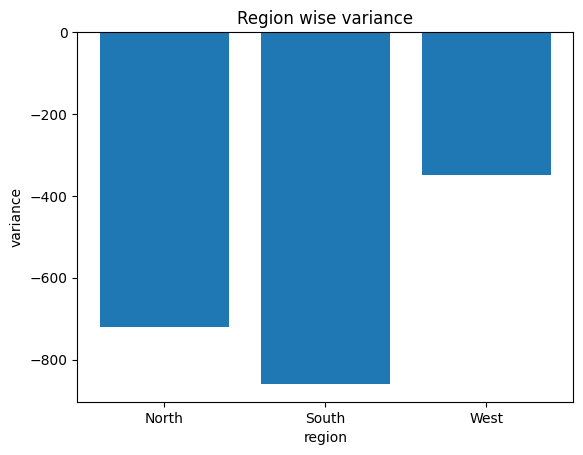

In [35]:
plt.bar(x=regionwise_variance['region'],height=regionwise_variance['variance'])
plt.xlabel("region")
plt.ylabel("variance")
plt.title("Region wise variance")
plt.show()

In [37]:
state_variance= merged_table.groupby(['state'])['variance'].sum().reset_index()
state_variance

,state,variance
0,Delhi,-140.0
1,Gujarat,-120.0
2,Haryana,-500.0
3,Karnataka,750.0
4,Kerala,210.0
5,Maharashtra,480.0
6,Punjab,-80.0
7,Rajasthan,-710.0
8,Tamil Nadu,-1820.0


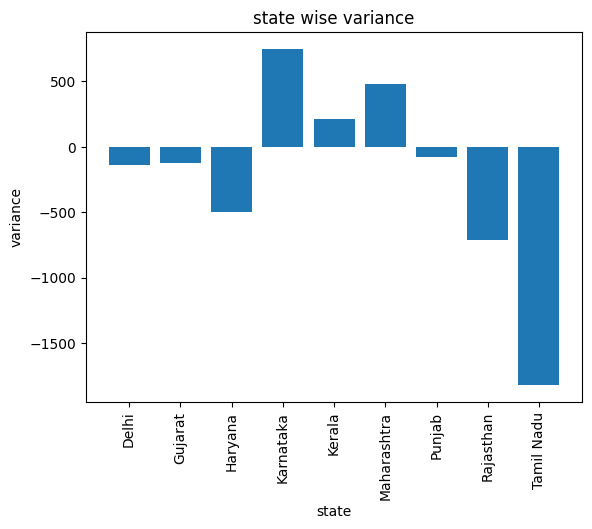

In [39]:
plt.bar(x=state_variance['state'],height=state_variance['variance'])
plt.xlabel("state")
plt.ylabel("variance")
plt.title("state wise variance")
plt.xticks(ticks=state_variance['state'],rotation=90)
plt.show()
